<a href="https://colab.research.google.com/github/VIPinKumar07/Quantitative-Finance/blob/main/Python%20for%20Finance/Data_Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('appl.csv', parse_dates=True, index_col=0)
print(df.shape)
df.head()

(3501, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3.501000e+03
mean,59.079221,59.721703,58.467464,59.121408,57.103503,2.434192e+08
std,54.567175,55.200975,53.990596,54.624564,55.012309,2.206230e+08
min,6.870357,7.000000,6.794643,6.858929,5.814176,2.404830e+07
25%,19.624287,19.775000,19.321428,19.502857,17.015955,9.360460e+07
50%,32.160000,32.389999,32.012501,32.174999,28.992750,1.535324e+08
75%,83.035004,86.402496,83.002502,83.974998,82.227287,3.296664e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.880998e+09


In [ ]:
# New features for checking gain or loss with amount for each day
# 1 for gain and -1 for loss and 0 otherwise

values = []
signs = []
colors=[]

for i in range(0, df.shape[0]):
  if df.iloc[i,3]>df.iloc[i,0]:
    values.append(df.iloc[i,3]-df.iloc[i,0])
    signs.append(1)
    colors.append('g')
  elif df.iloc[i,3]<df.iloc[i,0]:
    values.append(df.iloc[i,0]-df.iloc[i,3])
    signs.append(-1)
    colors.append('r')
  else:
    values.append(0)
    signs.append(0)
    colors.append('b')

df['g_l'] = signs
df['Amount'] = values
df.head()

,Open,High,Low,Close,Adj Close,Volume,g_l,Amount,Mov_avg
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600,1,0.020714,6.478999
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,-1,0.007857,6.484599
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000,-1,0.121786,6.452054
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-1,0.041786,6.432830
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800,1,0.060000,6.429772


In [ ]:
df.g_l.value_counts()

 1    1830
-1    1665
 0       6
Name: g_l, dtype: int64

<BarContainer object of 3501 artists>

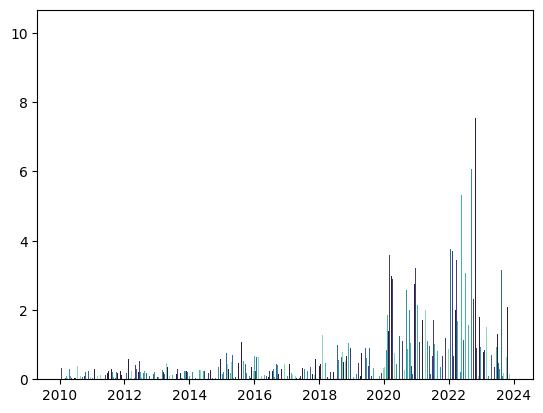

In [ ]:
plt.bar(df.index, df.Amount, color=sns.color_palette('mako'))

In [ ]:
# Moving Average
lot_size = 50
sum = 0
avg = []
for i in range(0,lot_size):
  sum += df.iloc[i,4]
  avg.append(sum/(i+1))

for i in range(lot_size, df.shape[0]):
  sum = sum+df.iloc[i,4]-df.iloc[i-lot_size,4]
  avg.append(sum/lot_size)

df['Mov_avg'] = avg
df.head()

,Open,High,Low,Close,Adj Close,Volume,g_l,Amount,Mov_avg
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600,1,0.020714,6.478999
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,-1,0.007857,6.484599
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000,-1,0.121786,6.452054
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-1,0.041786,6.432830
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800,1,0.060000,6.429772


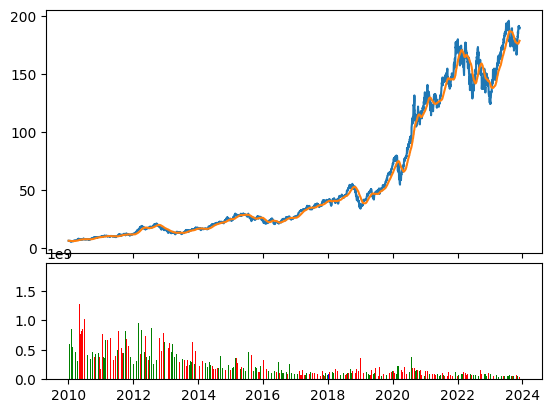

In [ ]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1),(4,0),rowspan=2, colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['Mov_avg'])
ax2.bar(df.index, df['Volume'], color=colors)

plt.show()